# Decorators

## Functions are objects

- funcaitons are like any other object, they can be manipulated like such
- for isntance function can be manipulated like a variable 
`x = func`: function without paranthesis --> function object

- function can be thrown as argument to another function 
- nested function, function returning a function etc are also okay


### Building a command line data app
You are building a command line tool that lets a user interactively explore a data set. We've defined four functions: mean(), std(), minimum(), and maximum() that users can call to analyze their data. Help finish this section of the code so that your users can call any of these functions by typing the function name at the input prompt.

Note: The function get_user_input() in this exercise is a mock version of asking the user to enter a command. It randomly returns one of the four function names. In real life, you would ask for input and wait until the user entered a value.

In [7]:
import numpy as np
# Add the missing function references to the function map
function_map = {
  'mean': np.mean,
  'std': np.std,
  'minimum': np.max,
  'maximum': np.min
}

data = np.random.randn(2,3)# load_data()
print(data)

func_name = 'maximum'

# Call the chosen function and pass "data" as an argument
function_map[func_name](data)

[[ 1.12749692  0.64091581 -1.99223464]
 [ 0.17737617  0.53398614  0.30111023]]


-1.9922346405143607

### Reviewing your co-worker's code
Your co-worker is asking you to review some code that they've written and give them some tips on how to get it ready for production. You know that having a docstring is considered best practice for maintainable, reusable functions, so as a sanity check you decide to run this has_docstring() function on all of their functions.
```python
def has_docstring(func):
  """Check to see if the function 
  `func` has a docstring.

  Args:
    func (callable): A function.

  Returns:
    bool
  """
  return func.__doc__ is not None
```

In [11]:
def load_and_plot_data():
    return None


def has_docstring(func):
  """Check to see if the function 
  `func` has a docstring.

  Args:
    func (callable): A function.

  Returns:
    bool
  """
  return func.__doc__ is not None

# Call has_docstring() on the load_and_plot_data() function
ok = has_docstring(load_and_plot_data)

if not ok:
  print("load_and_plot_data() doesn't have a docstring!")
else:
  print("load_and_plot_data() looks ok")

load_and_plot_data() doesn't have a docstring!


In [13]:
def as_2D():
    return None
# Call has_docstring() on the as_2D() function
ok = has_docstring(as_2D)

if not ok:
  print("as_2D() doesn't have a docstring!")
else:
  print("as_2D() looks ok")

as_2D() doesn't have a docstring!


In [14]:
def log_product():
    return None

# Call has_docstring() on the log_product() function
ok = has_docstring(log_product)

if not ok:
  print("log_product() doesn't have a docstring!")

log_product() doesn't have a docstring!


### Returning functions for a math game
You are building an educational math game where the player enters a math term, and your program returns a function that matches that term. For instance, if the user types "add", your program returns a function that adds two numbers. So far you've only implemented the "add" function. Now you want to include a "subtract" function.

In [15]:
def create_math_function(func_name):
  if func_name == 'add':
    def add(a, b):
      return a + b
    return add
  elif func_name == 'subtract':
    def subtract(a, b):
        return a-b
    return subtract
  else:
    print("I don't know that one")
    
add = create_math_function('add')
print('5 + 2 = {}'.format(add(5, 2)))

subtract = create_math_function('subtract')
print('5 - 2 = {}'.format(subtract(5, 2)))

5 + 2 = 7
5 - 2 = 3


## Scope 

- python checks
    - first local (inside funcition)
    - non-local scope
    - global scope
    - builtin-scope
- global keyword if you want to chang global var

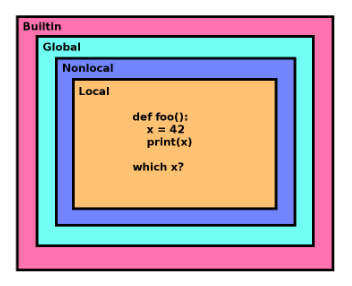

### Modifying variables outside local scope
Sometimes your functions will need to modify a variable that is outside of the local scope of that function. While it's generally not best practice to do so, it's still good to know-how in case you need to do it. Update these functions so they can modify variables that would usually be outside of their scope.

In [16]:
call_count = 0

def my_function():
  # Use a keyword that lets us update call_count 
  global call_count
  call_count += 1
  
  print("You've called my_function() {} times!".format(
    call_count
  ))
  
for _ in range(20):
  my_function()

You've called my_function() 1 times!
You've called my_function() 2 times!
You've called my_function() 3 times!
You've called my_function() 4 times!
You've called my_function() 5 times!
You've called my_function() 6 times!
You've called my_function() 7 times!
You've called my_function() 8 times!
You've called my_function() 9 times!
You've called my_function() 10 times!
You've called my_function() 11 times!
You've called my_function() 12 times!
You've called my_function() 13 times!
You've called my_function() 14 times!
You've called my_function() 15 times!
You've called my_function() 16 times!
You've called my_function() 17 times!
You've called my_function() 18 times!
You've called my_function() 19 times!
You've called my_function() 20 times!


In [18]:
def read_files():
  file_contents = None
  
  def save_contents(filename):
    # Add a keyword that lets us modify file_contents
    nonlocal file_contents
    if file_contents is None:
      file_contents = []
    with open(filename) as fin:
      file_contents.append(fin.read())
      
  for filename in ['data/1984.txt', 'data/MobyDick.txt', 'data/CatsEye.txt']:
    save_contents(filename)
    
  return file_contents

print('\n'.join(read_files()))

In [20]:
import random
def wait_until_done():
  def check_is_done():
    # Add a keyword so that wait_until_done() 
    # doesn't run forever
    global done
    if random.random() < 0.1:
      done = True
      
  while not done:
    check_is_done()

done = False
wait_until_done()

print('Work done? {}'.format(done))

Work done? True


## Closure
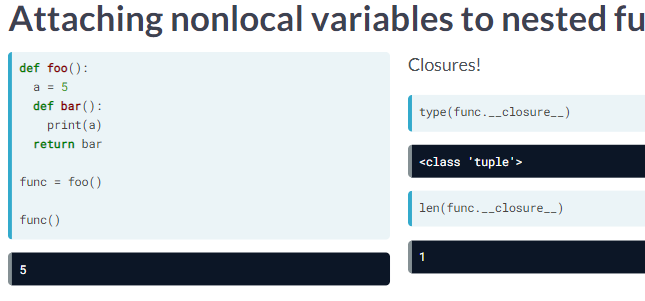

-  python nested funciton has __clsure__
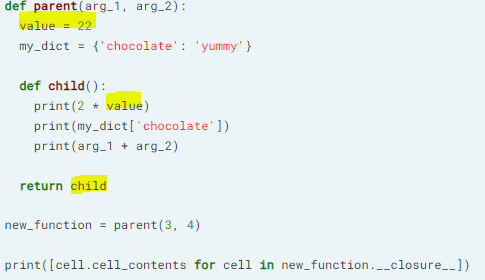

### Checking for closure
You're teaching your niece how to program in Python, and she is working on returning nested functions. She thinks she has written the code correctly, but she is worried that the returned function won't have the necessary information when called. Show her that all of the nonlocal variables she needs are in the new function's closure.

In [21]:
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

# Show that my_func()'s closure is not None
print(my_func.__closure__ is not None)

True


In [22]:
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

print(my_func.__closure__ is not None)

# Show that there are two variables in the closure
print(len(my_func.__closure__) == 2)

True
True


In [23]:
def return_a_func(arg1, arg2):
  def new_func():
    print('arg1 was {}'.format(arg1))
    print('arg2 was {}'.format(arg2))
  return new_func
    
my_func = return_a_func(2, 17)

print(my_func.__closure__ is not None)
print(len(my_func.__closure__) == 2)

# Get the values of the variables in the closure
closure_values = [
  my_func.__closure__[i].cell_contents for i in range(2)
]
print(closure_values == [2, 17])

True
True
True


### Closures keep your values safe
You are still helping your niece understand closures. You have written the function get_new_func() that returns a nested function. The nested function call_func() calls whatever function was passed to get_new_func(). You've also written my_special_function() which simply prints a message that states that you are executing my_special_function().

You want to show your niece that no matter what you do to my_special_function() after passing it to get_new_func(), the new function still mimics the behavior of the original my_special_function() because it is in the new function's closure.

In [24]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Redefine my_special_function() to just print "hello"
def my_special_function():
  print("hello")

new_func()

You are running my_special_function()


### Q
Show that even if you delete my_special_function(), you can still call new_func() without any problems.



In [25]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

new_func = get_new_func(my_special_function)

# Delete my_special_function()
del my_special_function

new_func()

You are running my_special_function()


# Q
Show that you still get the original message even if you overwrite my_special_function() with the new function.

In [26]:
def my_special_function():
  print('You are running my_special_function()')
  
def get_new_func(func):
  def call_func():
    func()
  return call_func

# Overwrite `my_special_function` with the new function
my_special_function = get_new_func(my_special_function)

my_special_function()

You are running my_special_function()


## Decorators
- something that can change a function 
```python 
@double_args
def
```
Wrapper
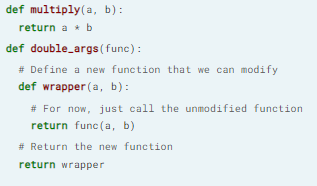

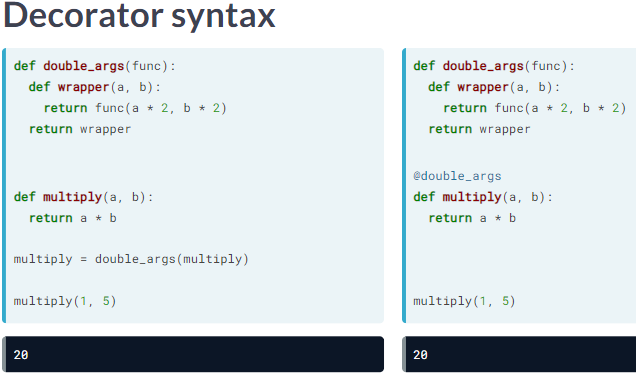

In [28]:
import print_args
def my_function(a, b, c):
  print(a + b + c)

# Decorate my_function() with the print_args() decorator
my_function = print_args(my_function)

my_function(1, 2, 3)

ModuleNotFoundError: No module named 'print_args'

In [29]:
# Decorate my_function() with the print_args() decorator
@print_args
def my_function(a, b, c):
  print(a + b + c)

my_function(1, 2, 3)

NameError: name 'print_args' is not defined

### Defining a decorator
Your buddy has been working on a decorator that prints a "before" message before the decorated function is called and prints an "after" message after the decorated function is called. They are having trouble remembering how wrapping the decorated function is supposed to work. Help them out by finishing their print_before_and_after() decorator.

In [30]:
def print_before_and_after(func):
  def wrapper(*args):
    print('Before {}'.format(func.__name__))
    # Call the function being decorated with *args
    func(*args)
    print('After {}'.format(func.__name__))
  # Return the nested function
  return wrapper
  

@print_before_and_after
def multiply(a, b):
  print(a * b)

multiply(5, 10)

Before multiply
50
After multiply
